In [16]:
%matplotlib inline
from collections import Counter
import random

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN

## 聚类数据

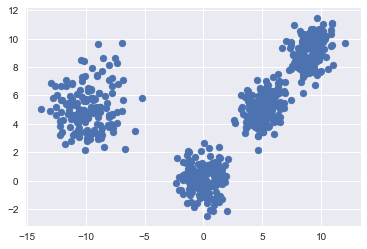

In [17]:
from scipy.stats import multivariate_normal
data = []
dist = multivariate_normal(mean=[0,0], cov=[[1,0],[0,1]])
for i in range(150):
    data.append(dist.rvs())
dist = multivariate_normal(mean=[5,5], cov=[[1,0.5],[0.2,1]])
for i in range(150):
    data.append(dist.rvs())
dist = multivariate_normal(mean=[9,9], cov=[[1,0.5],[0.2,1]])
for i in range(150):
    data.append(dist.rvs())
dist = multivariate_normal(mean=[-10,5], cov=[[3,0.5],[0.2,2]])
for i in range(150):
    data.append(dist.rvs())    
    
df = pd.DataFrame(data, columns=["x", "y"])
df.head()
plt.scatter(df['x'], df['y'])

In [18]:
def annulus(inner_radius, outer_radius, n=30, color='b'):
    """Generate n points with class `color` between the inner radius and the outer radius."""
    data = []
    diff = outer_radius - inner_radius
    for _ in range(n):
        # Pick an angle and radius
        angle = 2 * np.pi * random.random()
        r = inner_radius + diff * random.random()
        x = r * np.cos(angle)
        y = r * np.sin(angle)
        data.append((x, y))
    # Return a data frame for convenience
    xs, ys = zip(*data)
    df = pd.DataFrame()
    df["x"] = xs
    df["y"] = ys
    df["color"] = color
    return df

df1 = annulus(2, 6, 200, color='r')
df2 = annulus(8, 10, 300, color='b')
df_circ = pd.concat([df1, df2])

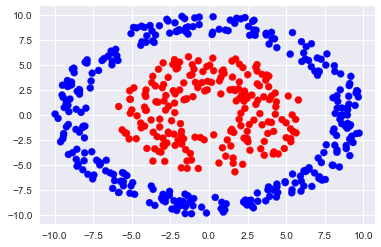

In [19]:
plt.scatter(df_circ['x'], df_circ['y'], c=df_circ['color'])

## kmeans

In [21]:
estimator = KMeans(n_clusters=2)
X = df[["x", "y"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print(labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

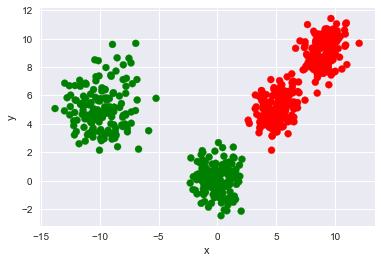

In [22]:
def set_colors(labels, colors='rgbykcm'):
    colored_labels = []
    for label in labels:
        colored_labels.append(colors[label])
    return colored_labels

colors = set_colors(labels)
plt.scatter(df['x'], df['y'], c=colors)
plt.xlabel("x")
plt.ylabel("y")

Counter({0: 152, 1: 150, 2: 150, 3: 148})


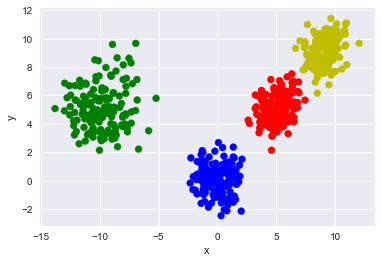

In [23]:
estimator = KMeans(n_clusters=4)
X = df[["x", "y"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print(Counter(labels))

colors = set_colors(labels)
plt.scatter(df['x'], df['y'], c=colors)
plt.xlabel("x")
plt.ylabel("y")

Counter({0: 251, 1: 249})


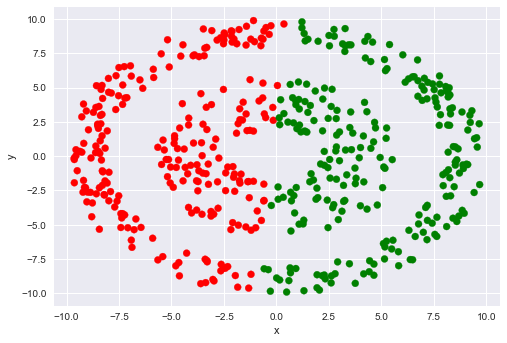

In [8]:
estimator = KMeans(n_clusters=2)
X = df_circ[["x", "y"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print(Counter(labels))

colors = set_colors(labels)
plt.scatter(df_circ['x'], df_circ['y'], c=colors)
plt.xlabel("x")
plt.ylabel("y")

## DBSCAN

Counter({1: 299, 0: 149, 2: 127, -1: 25})


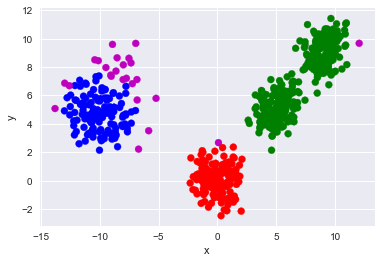

In [24]:
estimator = DBSCAN(eps=1, min_samples=10)
X = df[["x", "y"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print(Counter(labels))

colors = set_colors(labels)
plt.scatter(df['x'], df['y'], c=colors)
plt.xlabel("x")
plt.ylabel("y")

Counter({-1: 160, 1: 136, 2: 130, 0: 123, 3: 51})


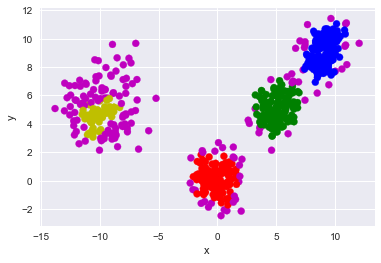

In [27]:
estimator = DBSCAN(eps=0.6, min_samples=10)
X = df[["x", "y"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print(Counter(labels))

colors = set_colors(labels)
plt.scatter(df['x'], df['y'], c=colors)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Counter({1: 300, 0: 200})


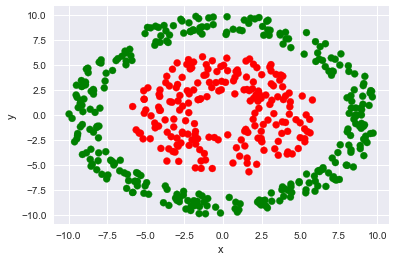

In [28]:
estimator = DBSCAN(eps=2, min_samples=10)
X = df_circ[["x", "y"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print(Counter(labels))

colors = set_colors(labels)
plt.scatter(df_circ['x'], df_circ['y'], c=colors)
plt.xlabel("x")
plt.ylabel("y")

## hierarchical clustering

Counter({2: 151, 0: 150, 3: 150, 1: 149})


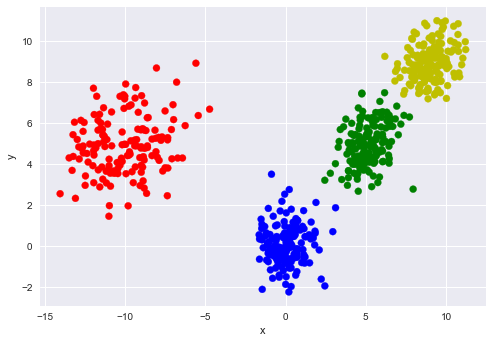

In [12]:
from sklearn.cluster import AgglomerativeClustering

# Fit an estimator
estimator = AgglomerativeClustering(n_clusters=4)
X = df[["x", "y"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print(Counter(labels))

colors = set_colors(labels)
plt.scatter(df['x'], df['y'], c=colors)
plt.xlabel("x")
plt.ylabel("y")

Counter({0: 313, 1: 187})


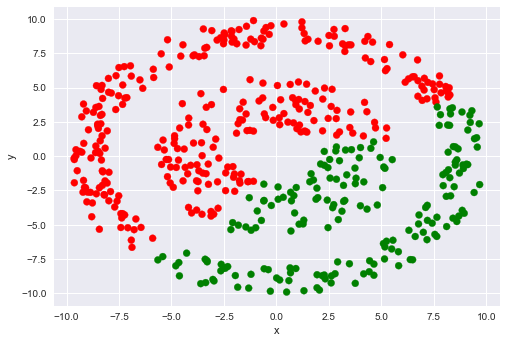

In [13]:
from sklearn.cluster import AgglomerativeClustering

# Fit an estimator
estimator = AgglomerativeClustering(n_clusters=2)
X = df_circ[["x", "y"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print(Counter(labels))

colors = set_colors(labels)
plt.scatter(df_circ['x'], df_circ['y'], c=colors)
plt.xlabel("x")
plt.ylabel("y")

In [29]:
from sklearn import metrics

estimator = KMeans(n_clusters=4)
X = df[["x", "y"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print(Counter(labels))

print(metrics.silhouette_score(X, labels, metric='euclidean'))

Counter({1: 152, 0: 150, 2: 150, 3: 148})
0.710304154834


In [30]:
estimator = DBSCAN(eps=0.8, min_samples=10)
X = df[["x", "y"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print(Counter(labels))
print(metrics.silhouette_score(X, labels, metric='euclidean'))

Counter({1: 149, 0: 144, 2: 140, 3: 105, -1: 62})
0.579391439011
